In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

daisy_img = cv2.imread("a1images/daisy.jpg")

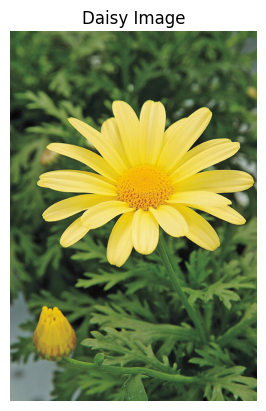

In [16]:
#Display the image
plt.imshow(cv2.cvtColor(daisy_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Daisy Image')
plt.show()


In [17]:
daisy_img_rgb = cv2.cvtColor(daisy_img, cv2.COLOR_BGR2RGB)

# Create an initial mask
mask = np.zeros(daisy_img.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle for the GrabCut algorithm
# The rectangle should enclose the object to be segmented (foreground).
rect = (50, 50, daisy_img.shape[1]-50, daisy_img.shape[0]-50)

# Apply the GrabCut algorithm
cv2.grabCut(daisy_img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask such that all probable foreground and definite foreground pixels are marked as foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract the segmented foreground
foreground = daisy_img_rgb * mask2[:, :, np.newaxis]

# Extract the background (everything outside the foreground)
background = daisy_img_rgb * (1 - mask2[:, :, np.newaxis])

In [19]:

blurred_background = cv2.GaussianBlur(background, (55, 55), 0)

# Combine the sharp foreground with the blurred background
enhanced_image = np.where(mask2[:, :, np.newaxis] == 1, daisy_img_rgb, blurred_background)

In [20]:
# Original image blur
daisy_img_rgb_blurred = cv2.GaussianBlur(daisy_img_rgb, (55, 55), 0)

# Combine the sharp foreground with the blurred original
enhanced_image_new = np.where(mask2[:, :, np.newaxis] == 1, daisy_img_rgb, daisy_img_rgb_blurred)

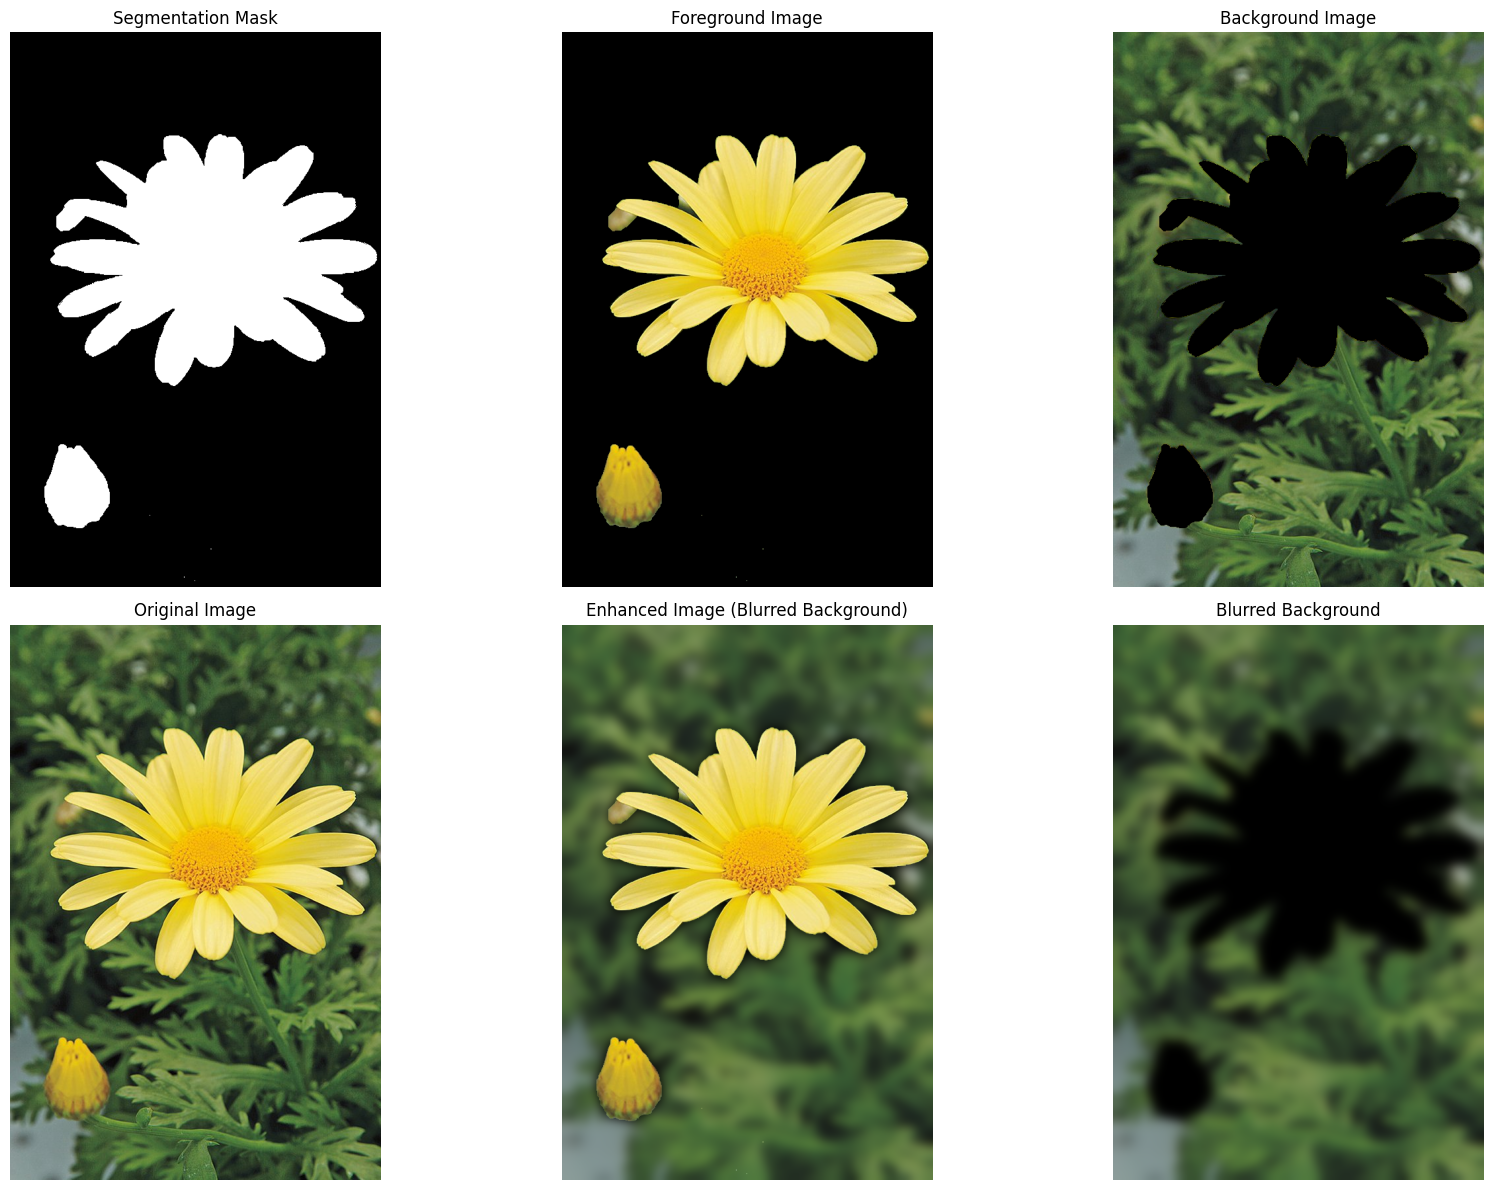

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the number of subplots and figure size
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Plot the first row (Segmentation Mask, Foreground, Background)
ax[0, 0].imshow(mask2, cmap='gray')
ax[0, 0].set_title('Segmentation Mask')
ax[0, 0].axis('off')

ax[0, 1].imshow(foreground)
ax[0, 1].set_title('Foreground Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(background)
ax[0, 2].set_title('Background Image')
ax[0, 2].axis('off')

# Plot the second row (Original, Enhanced, and Blurred Background)
ax[1, 0].imshow(daisy_img_rgb)
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(enhanced_image)
ax[1, 1].set_title('Enhanced Image (Blurred Background)')
ax[1, 1].axis('off')

ax[1, 2].imshow(blurred_background)
ax[1, 2].set_title('Blurred Background')
ax[1, 2].axis('off')

# Show the combined plot
plt.tight_layout()
plt.show()
